In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf
from dateutil.relativedelta import relativedelta

In [2]:
Stardate=datetime(2005, 1, 1)
Enddate=datetime(2011, 12, 31)

tck_DJ_data = yf.download('^DJI', Stardate-timedelta(weeks=1),Enddate)
Close_DJ_data=pd.DataFrame(tck_DJ_data['Close'])


[*********************100%***********************]  1 of 1 completed


In [3]:
Close_DJ_data=  Close_DJ_data.reset_index()
Close_DJ_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [4]:
Close_DJ_data.head(5)

,Date,Close
0,2004-12-27,10776.129883
1,2004-12-28,10854.540039
2,2004-12-29,10829.190430
3,2004-12-30,10800.299805
4,2004-12-31,10783.009766


In [5]:
print(datetime(2004,12, 27)==Close_DJ_data['Date'][0])

True


In [6]:
Close_DJ_data = (Close_DJ_data.set_index('Date')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['Date'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [7]:
paper = pd.read_csv('PreisMoatStanley2013.dat',delimiter=' ', parse_dates =[0,1,100,101] )


In [8]:
paper

,Google Start Date,Google End Date,arts,banking,bonds,bubble,buy,cancer,car,cash,...,trader,train,transaction,travel,unemployment,war,water,world,DJIA Date,DJIA Closing Price
0,2004-01-04,2004-01-10,0.956667,0.193333,0.203333,0.183333,2.41667,0.913333,4.19333,0.326667,...,0.346667,0.706667,0.050000,2.060000,0.336667,2.02000,1.91333,4.83333,2004-01-12,10485.18
1,2004-01-11,2004-01-17,0.970000,0.203333,0.186667,0.190000,2.31667,0.940000,4.22000,0.320000,...,0.346667,0.676667,0.050000,2.053330,0.296667,2.09333,1.93333,4.76667,2004-01-20,10528.66
2,2004-01-18,2004-01-24,0.926667,0.196667,0.190000,0.173333,2.35000,0.906667,4.10667,0.320000,...,0.356667,0.713333,0.056667,2.013330,0.310000,1.97333,1.89333,4.60000,2004-01-26,10702.51
3,2004-01-25,2004-01-31,0.950000,0.196667,0.180000,0.196667,2.26667,0.906667,3.99333,0.330000,...,0.336667,0.710000,0.060000,1.913330,0.296667,1.90667,1.92000,4.53333,2004-02-02,10499.18
4,2004-02-01,2004-02-07,0.893333,0.203333,0.183333,0.173333,2.08333,0.913333,3.84000,0.303333,...,0.326667,0.630000,0.050000,1.766670,0.290000,2.08667,1.88667,4.53333,2004-02-09,10579.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2011-01-23,2011-01-29,0.503333,0.533333,0.133333,0.303333,2.86667,0.800000,3.20667,0.410000,...,0.303333,0.743333,0.040000,0.906667,0.663333,1.16000,1.97333,3.53333,2011-01-31,11891.93
369,2011-01-30,2011-02-05,0.490000,0.573333,0.130000,0.296667,2.85000,0.763333,3.14667,0.393333,...,0.306667,0.720000,0.040000,0.926667,0.616667,1.12667,2.02667,3.53333,2011-02-07,12161.63
370,2011-02-06,2011-02-12,0.500000,0.553333,0.133333,0.296667,2.85000,0.800000,3.21333,0.396667,...,0.303333,0.693333,0.040000,0.886667,0.593333,1.18667,2.00000,3.50000,2011-02-14,12268.19
371,2011-02-13,2011-02-19,0.480000,0.443333,0.130000,0.300000,2.90000,0.793333,3.30000,0.413333,...,0.300000,0.713333,0.040000,0.866667,0.543333,1.17333,1.96000,3.66667,2011-02-22,12212.79


In [9]:
df_gt=pd.DataFrame({'GoogleWE':paper['Google End Date'],'debt':paper['debt'].astype(np.float64),\
    'DJIADate':paper['DJIA Date'],'DJIAClose':paper['DJIA Closing Price'].astype(np.float64)})


In [10]:
df_gt = (df_gt.set_index('GoogleWE')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['GoogleWE'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [11]:
inital_date=datetime(2005,1,3)
for i in range(5):
    print(inital_date-timedelta(weeks=i))

2005-01-03 00:00:00
2004-12-27 00:00:00
2004-12-20 00:00:00
2004-12-13 00:00:00
2004-12-06 00:00:00


In [12]:
df_gt.head()

,GoogleWE,debt,DJIADate,DJIAClose
0,2004-12-25,0.133333,2004-12-27,10776.13
1,2004-12-26,0.133333,2004-12-27,10776.13
2,2004-12-27,0.133333,2004-12-27,10776.13
3,2004-12-28,0.133333,2004-12-27,10776.13
4,2004-12-29,0.133333,2004-12-27,10776.13


In [13]:
df_gt.dtypes

GoogleWE     datetime64[ns]
debt                float64
DJIADate     datetime64[ns]
DJIAClose           float64
dtype: object

In [14]:
#Close_DJ_data=Close_DJ_data.loc[Close_DJ_data['Date']>=Stardate+timedelta(days=2)]
#df_gt=df_gt.loc[df_gt['GoogleWE']>=Stardate+timedelta(days=2)]

In [15]:
Cnsl_db = pd.merge(Close_DJ_data, df_gt, how='inner', left_on = 'Date', right_on='GoogleWE')

In [16]:
Cnsl_db=Cnsl_db.loc[Cnsl_db['Date']>=Stardate+timedelta(days=2)]

In [17]:
Cnsl_db.head(5)

,Date,Close,GoogleWE,debt,DJIADate,DJIAClose
7,2005-01-03,10729.429688,2005-01-03,0.16,2005-01-03,10729.43
8,2005-01-04,10630.780273,2005-01-04,0.16,2005-01-03,10729.43
9,2005-01-05,10597.830078,2005-01-05,0.16,2005-01-03,10729.43
10,2005-01-06,10622.879883,2005-01-06,0.16,2005-01-03,10729.43
11,2005-01-07,10603.959961,2005-01-07,0.16,2005-01-03,10729.43


In [18]:
Cnsl_db2 = (Cnsl_db.set_index('Date')
      .reindex(pd.date_range(Stardate+timedelta(days=2), Enddate, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())

<AxesSubplot:xlabel='Date'>

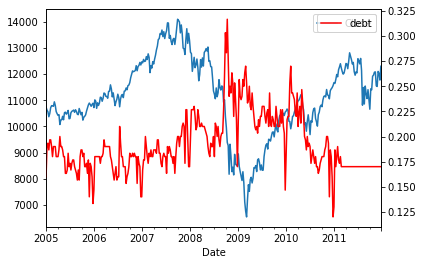

In [20]:
ax = Cnsl_db2.plot('Date','Close')
ax1 = ax.twinx()
Cnsl_db2.plot('Date','debt',ax=ax1, color='r')